# Crank-Nicolson
--- 

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import palettable as pl
emr = pl.cartocolors.sequential.Emrld_7.get_mpl_colormap()

from quantum_mechanics import WaveFunction
from utils import box_potential

In [45]:
N = 2000 # spatial discretization
Nt = 2000 # temporal discretization
n = np.arange(N) # for n-related stuff
x = np.linspace(0,1, N) # the spatial axis
t = np.linspace(0, 1500, Nt) # temporal axis
dt = t[1]-t[0]
potential_strength = 1e3
V = box_potential(N, potential_strength)

In [46]:
%time wave = WaveFunction(N, V)
%time wave.construct_hamiltonian()
%time wave.solve_eigenvalues()

Wall time: 1.01 ms
Wall time: 983 µs
Wall time: 2.9 s


In [62]:
x = np.linspace(0, 1, N)
# psi0 = np.sqrt(2)*np.sin(np.pi*x)
psi0 = (wave.v[:,0] + wave.v[:,1])/np.sqrt(2)
wave.set_initial_state(psi0)

Initial state set. Normalization: (1.0000000000000002+0j)


In [63]:
%time wave.crank_nicolson(N_temporal=Nt, dt=dt)

Lu done
Wall time: 11.8 s


In [69]:
%time wave.construct_psi(np.sqrt(wave.N)*psi0, t)

Wall time: 1.08 s


Text(0, 0.5, '$|\\Psi|^2$')

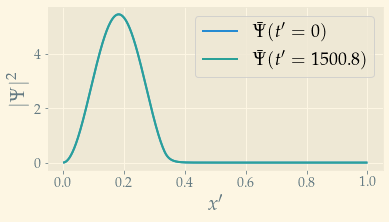

In [89]:
# plt.plot(np.abs(wave.psi[-1])**2)
plt.figure(figsize=(6, 3))
plt.plot(x, np.abs(wave.psi0)**2, label=fr"$\bar\Psi(t'=0)$")
plt.plot(x, np.abs(wave.psi_crank)**2, label = fr"$\bar\Psi(t'={Nt*dt:.1f})$")
plt.legend()
plt.xlabel(fr"$x'$", size=20)
plt.ylabel(fr"$|\Psi|^2$", size=20)